In [27]:
import numpy as np
import matplotlib.pyplot as plt
from hubbard import Hubbard
from tqdm import tqdm

lattice_size = 10
num_electrons_values = [50, 75, 90, 100, 110, 125, 150]
num_steps = 25000
u_t_values_dense = np.logspace(-1, 1, 30)
u_t_values_wide = np.logspace(-3, 3, 30)

u_t_values = np.unique(np.concatenate((u_t_values_dense, u_t_values_wide)))

results = {}

for num_electrons in tqdm(num_electrons_values, desc="Processing electron values"):
    success_ratios = []
    
    for u_t in u_t_values:
        u = u_t
        t = 1.0
        
        # Initialize a fresh lattice model in AFM mode
        hubbard = Hubbard(size=lattice_size, u=u, t=t, num_electrons=num_electrons)
        hubbard.initialize_lattice()
        
        # Track successful and failed attempts
        successful = 0
        failed = 0
        
        for _ in range(num_steps):
            success, _, _, _ = hubbard.simulate_step()
            if success:
                successful += 1
            else:
                failed += 1
        
        # Compute the success ratio
        success_ratio = successful / (successful + failed)
        success_ratios.append(success_ratio)
    
    # Store results for this electron count
    results[num_electrons] = success_ratios

Processing electron values: 100%|██████████| 7/7 [01:07<00:00,  9.62s/it]


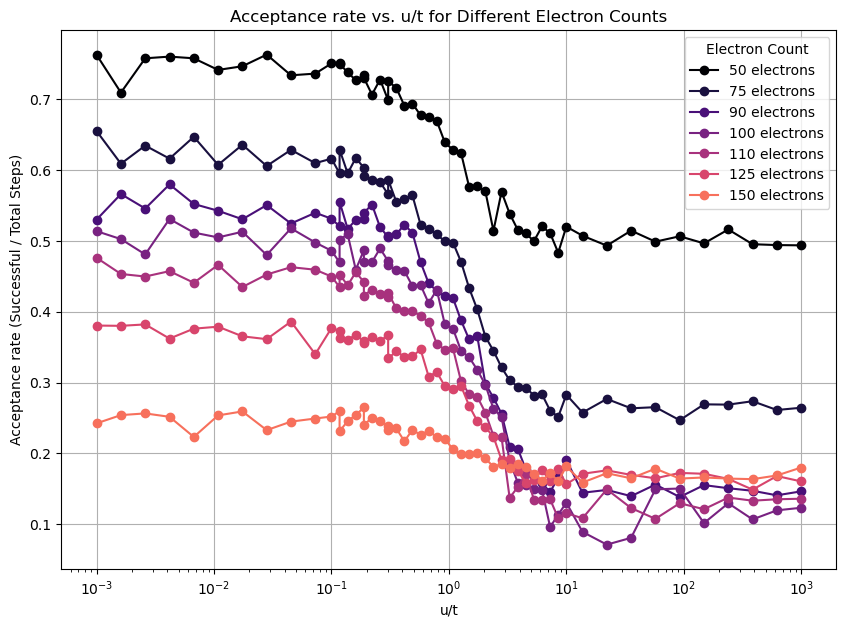

In [23]:
plt.figure(figsize=(10, 7))

colors = plt.cm.magma(np.linspace(0, 0.7, len(num_electrons_values)))

for idx, num_electrons in enumerate(num_electrons_values):
    plt.plot(u_t_values, results[num_electrons], 
             marker='o', linestyle='-', color=colors[idx], label=f'{num_electrons} electrons')

plt.xscale('log')
plt.xlabel('u/t')
plt.ylabel('Acceptance rate (Successful / Total Steps)')
plt.title('Acceptance rate vs. u/t for Different Electron Counts')
plt.legend(title='Electron Count')
plt.grid(True)
plt.show()

Simulating lattice sizes: 100%|██████████| 6/6 [00:02<00:00,  2.53it/s]


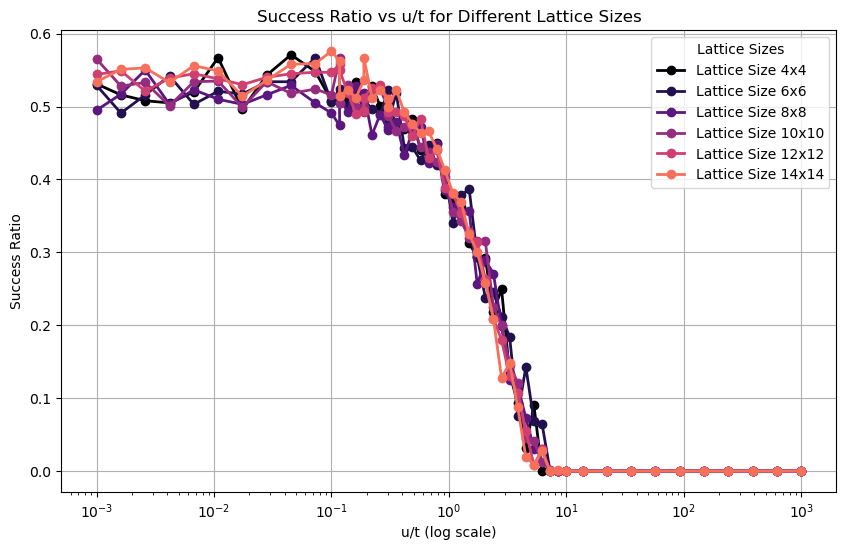

In [26]:
lattice_sizes = [4, 6, 8, 10, 12, 14]
step_count = 1000

plt.figure(figsize=(10, 6))
colors = plt.cm.magma(np.linspace(0, 0.7, len(lattice_sizes)))

i = 0
for size in tqdm(lattice_sizes, desc="Simulating lattice sizes"):
    num_electrons = size ** 2
    success_ratios = []

    for u_t in u_t_values:
        u = u_t
        t = 1.0

        hubbard = Hubbard(size=size, u=u, t=t, num_electrons=num_electrons)
        hubbard.initialize_af()

        success_count, fail_count = 0, 0
        for _ in range(step_count):
            success, _, _, _ = hubbard.simulate_step()
            if success:
                success_count += 1
            else:
                fail_count += 1

        success_ratio = success_count / (fail_count + success_count)
        success_ratios.append(success_ratio)

    plt.plot(
        u_t_values,
        success_ratios,
        marker='o',
        linestyle='-',
        label=f"Lattice Size {size}x{size}",
        color=colors[i],
        lw=2
    )
    i += 1

plt.xscale("log")
plt.xlabel("u/t (log scale)")
plt.ylabel("Success Ratio")
plt.title("Success Ratio vs u/t for Different Lattice Sizes")
plt.legend(title="Lattice Sizes")
plt.grid(True)
plt.show()